In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/Virtual Internship/Final Task/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
desc = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/Virtual Internship/Final Task/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
desc[desc['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [5]:
df_train.shape

(307511, 122)

In [6]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Data Pre-Processing

## Data Cleaning

### Missing Value

In [8]:
df_train.isnull().values.any()

True

In [9]:
missing_values = df_train.isnull().sum()

In [10]:
# Put threshold which total missing value = 1%
threshold = 0.01

# Drop columns with more than threshold % missing values
df_deleted_columns = df_train.dropna(thresh=df_train.shape[0]*(1-threshold), axis=1)

# Compare the original DataFrame with the modified DataFrame
print('Original columns:', len(missing_values))
print('New columns:', len(df_deleted_columns.columns))
print('Deleted columns:', set(missing_values.index) - set(df_deleted_columns.columns))

Original columns: 122
New columns: 65
Deleted columns: {'AMT_REQ_CREDIT_BUREAU_MON', 'ENTRANCES_AVG', 'BASEMENTAREA_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'NONLIVINGAPARTMENTS_AVG', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'NONLIVINGAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE', 'COMMONAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'BASEMENTAREA_MEDI', 'OCCUPATION_TYPE', 'APARTMENTS_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'LIVINGAREA_MEDI', 'ELEVATORS_MODE', 'YEARS_BUILD_MODE', 'LIVINGAREA_AVG', 'APARTMENTS_MEDI', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BEGINEXPLUATATION_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'NONLIVINGAREA_MODE', 'EMERGENCYSTATE_MODE', 'EXT_SOURCE_1', 'LIVINGAPARTMENTS_AVG', 'OWN_CAR_AGE', 'FLOORSMIN_MEDI', 'COMMONAREA_MEDI', 'YEARS_BUILD_AVG', 'FONDKAPREMONT_MODE', 'ELEVATORS_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'WALLSMATERIAL_MODE', 'LIVINGAPARTMENTS_MODE', '

In [11]:
df_deleted_columns.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [12]:
df_deleted_columns.dropna(inplace=True)

In [13]:
df_deleted_columns.isnull().values.any()

False

### Duplicated Data

In [14]:
df_deleted_null = df_deleted_columns.copy()
df_deleted_null.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_deleted_null.duplicated().values.any()

False

In [16]:
df_deleted_null.duplicated().sum()

0

In [17]:
df_deleted_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

## Feature Encoding

In [18]:
df_enc = df_deleted_null.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
numerical = [num for num in dict(df_enc.dtypes) if dict(df_deleted_null.dtypes)[num] in ['int64', 'float64']]

In [21]:
categorical = [cat for cat in dict(df_enc.dtypes) if dict(df_deleted_null.dtypes)[cat] in ['object']]

In [22]:
for col in categorical :
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

In [23]:
df_pre_model = pd.concat([df_enc[numerical], df_enc[categorical]], axis = 1)

In [24]:
df_pre_model.shape

(304531, 65)

## Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import array 

In [26]:
X = df_pre_model.drop('TARGET', axis=1)
y = df_pre_model['TARGET']

In [27]:
select_feature = SelectKBest(f_classif, k=15)
select_feature.fit(X, y)
X_new = select_feature.transform(X)
print("Num Features before:", X.shape[1])
print("Num Features after:", X_new.shape[1])
print("New data dimension", X_new.shape)

Num Features before: 64
Num Features after: 15
New data dimension (304531, 15)


In [28]:
X_new = X.iloc[:,select_feature.get_support()]
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DAYS_BIRTH                   304531 non-null  int64  
 1   DAYS_EMPLOYED                304531 non-null  int64  
 2   DAYS_REGISTRATION            304531 non-null  float64
 3   DAYS_ID_PUBLISH              304531 non-null  int64  
 4   FLAG_EMP_PHONE               304531 non-null  int64  
 5   REGION_RATING_CLIENT         304531 non-null  int64  
 6   REGION_RATING_CLIENT_W_CITY  304531 non-null  int64  
 7   REG_CITY_NOT_LIVE_CITY       304531 non-null  int64  
 8   REG_CITY_NOT_WORK_CITY       304531 non-null  int64  
 9   EXT_SOURCE_2                 304531 non-null  float64
 10  DAYS_LAST_PHONE_CHANGE       304531 non-null  float64
 11  FLAG_DOCUMENT_3              304531 non-null  int64  
 12  CODE_GENDER                  304531 non-null  int64  
 13 

In [29]:
df_model = pd.concat([X_new, y], axis = 1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DAYS_BIRTH                   304531 non-null  int64  
 1   DAYS_EMPLOYED                304531 non-null  int64  
 2   DAYS_REGISTRATION            304531 non-null  float64
 3   DAYS_ID_PUBLISH              304531 non-null  int64  
 4   FLAG_EMP_PHONE               304531 non-null  int64  
 5   REGION_RATING_CLIENT         304531 non-null  int64  
 6   REGION_RATING_CLIENT_W_CITY  304531 non-null  int64  
 7   REG_CITY_NOT_LIVE_CITY       304531 non-null  int64  
 8   REG_CITY_NOT_WORK_CITY       304531 non-null  int64  
 9   EXT_SOURCE_2                 304531 non-null  float64
 10  DAYS_LAST_PHONE_CHANGE       304531 non-null  float64
 11  FLAG_DOCUMENT_3              304531 non-null  int64  
 12  CODE_GENDER                  304531 non-null  int64  
 13 

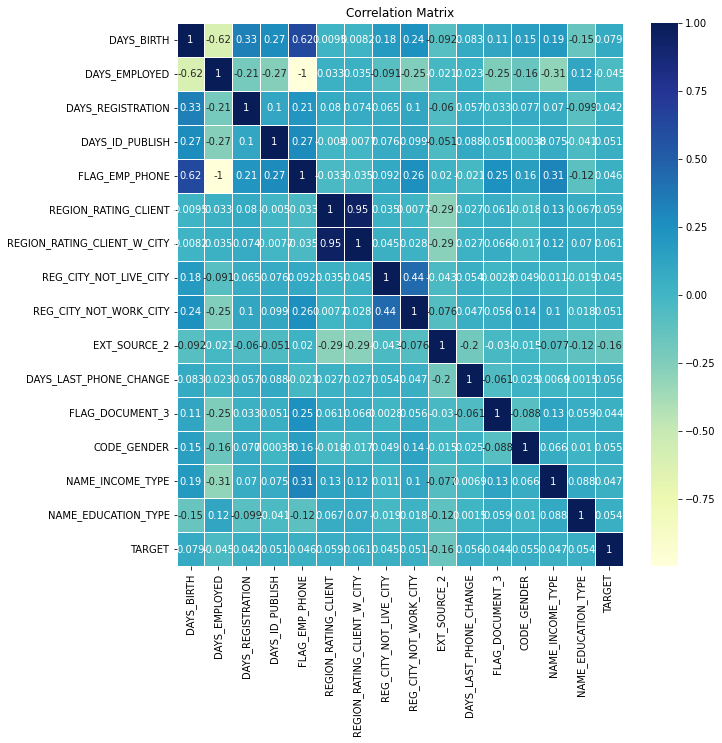

In [30]:
df_numerized = df_model.copy()

plt.figure(figsize=(10,10))
sns.heatmap(data=df_numerized.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation Matrix', fontsize=12);

# Data Visualization and Business Insight

In [31]:
df_deleted_null['TARGET'].value_counts()

0    279864
1     24667
Name: TARGET, dtype: int64

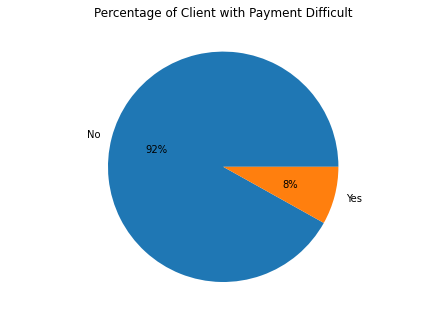

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
Target = df_deleted_null.TARGET.value_counts()
ax.pie(Target, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Client with Payment Difficult')
plt.show()

In [33]:
df_deleted_null['CODE_GENDER'].value_counts()

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

In [34]:
df_gender = df_deleted_null[df_deleted_null['CODE_GENDER'] != 'XNA' ]
df_gender.groupby(['TARGET', 'CODE_GENDER'])['SK_ID_CURR'].count()

TARGET  CODE_GENDER
0       F              186419
        M               93441
1       F               14063
        M               10604
Name: SK_ID_CURR, dtype: int64

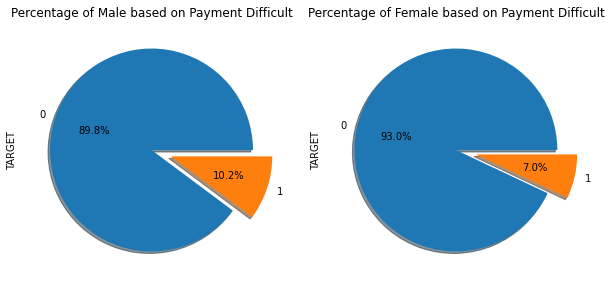

In [35]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_gender['TARGET'][df_gender['CODE_GENDER']=='M'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_gender['TARGET'][df_gender['CODE_GENDER']=='F'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Percentage of Male based on Payment Difficult')
ax[1].set_title('Percentage of Female based on Payment Difficult')
plt.show()

# Machine Learning Implementation and Evaluation

In [36]:
df_model.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,TARGET
0,-9461,-637,-3648.0,-2120,1,2,2,0,0,0.262949,-1134.0,1,1,7,4,1
1,-16765,-1188,-1186.0,-291,1,1,1,0,0,0.622246,-828.0,1,0,4,1,0
2,-19046,-225,-4260.0,-2531,1,2,2,0,0,0.555912,-815.0,0,1,7,4,0
3,-19005,-3039,-9833.0,-2437,1,2,2,0,0,0.650442,-617.0,1,0,7,4,0
4,-19932,-3038,-4311.0,-3458,1,2,2,0,1,0.322738,-1106.0,0,1,7,4,0


In [37]:
pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import scorecardpy as sc

In [39]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(df_model, y='TARGET')

[INFO] filtering variables ...
Variable filtering on 304531 rows and 16 columns in 00:04:10 
0 variables are removed


In [40]:
dt_s.head()

,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,DAYS_EMPLOYED,FLAG_DOCUMENT_3,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,DAYS_REGISTRATION,NAME_EDUCATION_TYPE,FLAG_EMP_PHONE,DAYS_BIRTH,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,CODE_GENDER,TARGET
0,-2120,2,-637,1,-1134.0,2,0.262949,0,-3648.0,4,1,-9461,0,7,1,1
1,-291,1,-1188,1,-828.0,1,0.622246,0,-1186.0,1,1,-16765,0,4,0,0
2,-2531,2,-225,0,-815.0,2,0.555912,0,-4260.0,4,1,-19046,0,7,1,0
3,-2437,2,-3039,1,-617.0,2,0.650442,0,-9833.0,4,1,-19005,0,7,0,0
4,-3458,2,-3038,0,-1106.0,2,0.322738,0,-4311.0,4,1,-19932,1,7,1,0


In [41]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'TARGET').values()

print(train.shape)
print(test.shape)

(213172, 16)
(91359, 16)


In [42]:
# woe binning
bins = sc.woebin(dt_s, y="TARGET")

[INFO] creating woe binning ...
Binning on 304531 rows and 16 columns in 00:00:59


{'DAYS_ID_PUBLISH': <Figure size 432x288 with 2 Axes>,
 'REGION_RATING_CLIENT': <Figure size 432x288 with 2 Axes>,
 'FLAG_DOCUMENT_3': <Figure size 432x288 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 432x288 with 2 Axes>,
 'DAYS_LAST_PHONE_CHANGE': <Figure size 432x288 with 2 Axes>,
 'REGION_RATING_CLIENT_W_CITY': <Figure size 432x288 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>,
 'REG_CITY_NOT_LIVE_CITY': <Figure size 432x288 with 2 Axes>,
 'DAYS_REGISTRATION': <Figure size 432x288 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 432x288 with 2 Axes>,
 'FLAG_EMP_PHONE': <Figure size 432x288 with 2 Axes>,
 'DAYS_BIRTH': <Figure size 432x288 with 2 Axes>,
 'REG_CITY_NOT_WORK_CITY': <Figure size 432x288 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>,
 'CODE_GENDER': <Figure size 432x288 with 2 Axes>}

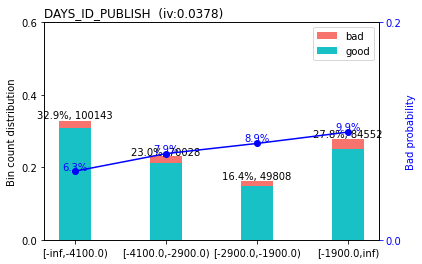

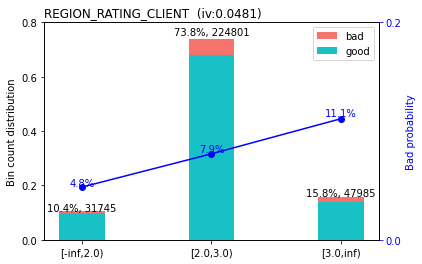

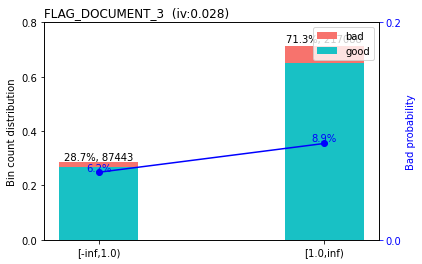

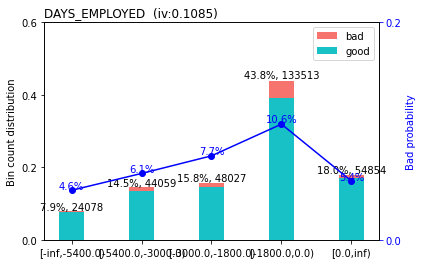

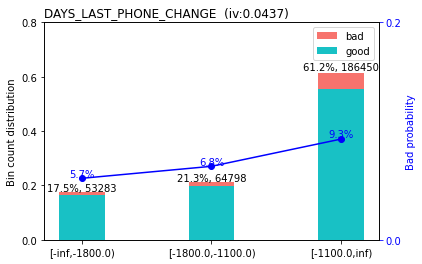

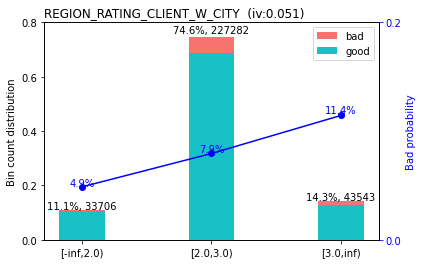

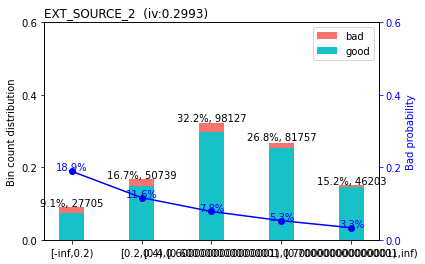

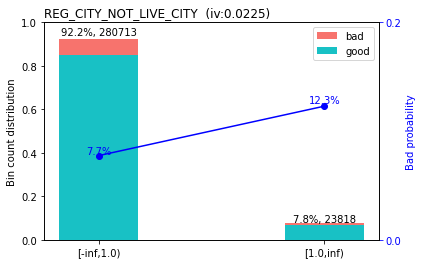

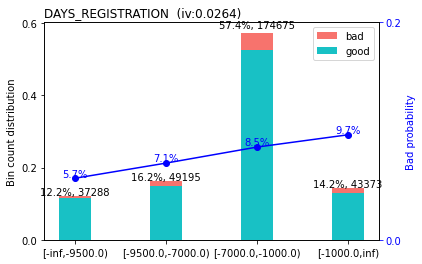

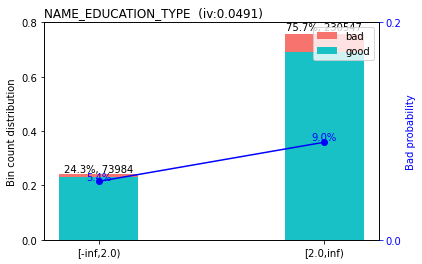

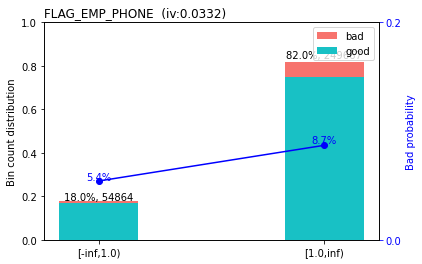

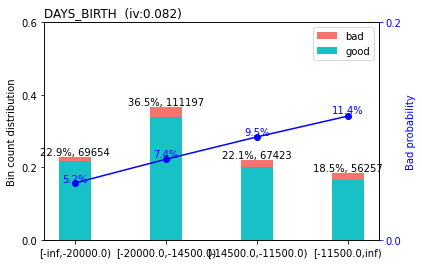

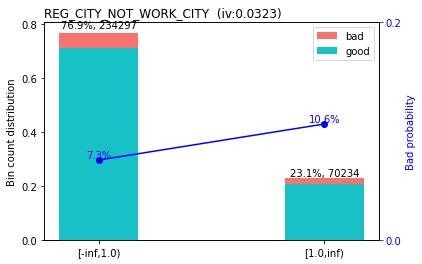

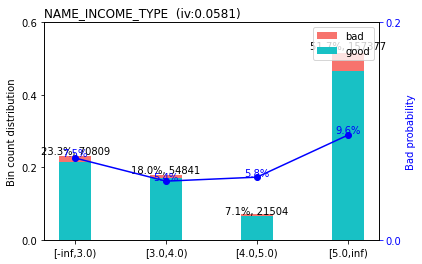

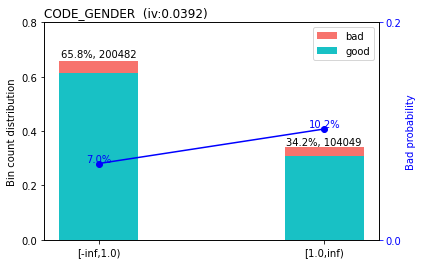

In [43]:
sc.woebin_plot(bins)

In [44]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
Woe transformating on 213172 rows and 15 columns in 00:00:15
[INFO] converting into woe values ...


In [63]:
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [66]:
# predicted probability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

In [67]:
# score 
card = sc.scorecard(bins, lr, X_train.columns)

In [68]:
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

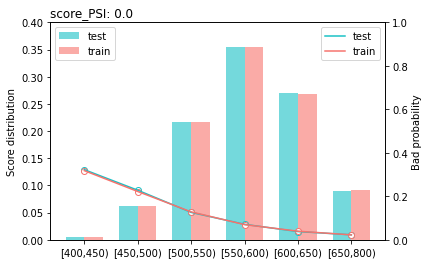

{'psi':   variable       PSI
 0    score  0.000037, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [69]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [70]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [71]:
fpr_prob, tpr_prob, _ = roc_curve(y_test, test_pred)

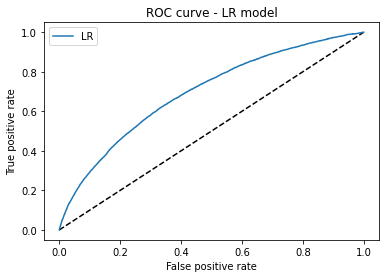

In [72]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_prob, tpr_prob, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

In [73]:
metrics.auc(fpr_prob,tpr_prob) #auc = area under curve; The higher the auc, the better the prediction

0.69468465463999

## Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [76]:
parameters_lr = {
                'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                # 'class_weight': ['balanced', 'balanced_subsample', None]
                # 'dual': [True, False],
                # 'fit_intercept': [True, False],
                # 'intercept_scaling': [0.01, 0.1, 1.0, 10.0, 100.0],
                # 'l1_ratio': [0, 1, None],
                'max_iter': [10, 20, 30, 40, 50],
                # 'multi_class': ['auto', 'ovr', 'multinomial'],
                'n_jobs': [None, -1],
                # 'penalty': ['l1', 'l2', 'elasticnet', None],
                # 'random_state': [0, 42, 123, None],
                # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001],
                # 'verbose': [1, 10, 100],
                # 'warm_start': [True, False]
                }

In [77]:
grid = GridSearchCV(estimator = lr, param_grid = parameters_lr, cv=3)

In [78]:
best_model_lr = grid.fit(X_train, y_train)

In [79]:
best_model_lr.best_params_

{'C': 0.01, 'max_iter': 10, 'n_jobs': None, 'tol': 0.1}

In [81]:
new_lr = LogisticRegression(C=0.01, max_iter=10, n_jobs=None, tol=0.1)
lr_new = new_lr.fit(X_train, y_train)

In [82]:
# predicted probability
train_pred = lr_new.predict_proba(X_train)[:,1]
test_pred = lr_new.predict_proba(X_test)[:,1]

In [83]:
# woe binning
bins = sc.woebin(dt_s, y="TARGET")

[INFO] creating woe binning ...
Binning on 304531 rows and 16 columns in 00:00:44


In [84]:
# score 
card = sc.scorecard(bins, lr_new, X_train.columns)

In [85]:
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

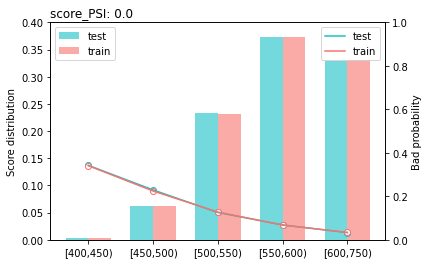

{'psi':   variable       PSI
 0    score  0.000033, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [86]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [87]:
fpr_prob, tpr_prob, _ = roc_curve(y_test, test_pred)

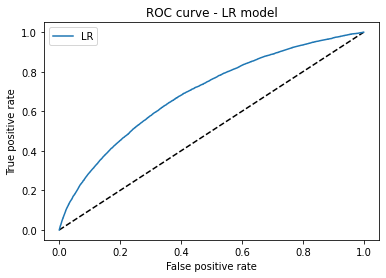

In [88]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_prob, tpr_prob, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')
plt.show()

In [89]:
metrics.auc(fpr_prob,tpr_prob) #auc = area under curve; The higher the auc, the better the prediction

0.693308262108629